# Data management

## Machine Learning - Classifications

## [Michel Coppée](https://www.uliege.be/cms/c_9054334/fr/repertoire?uid=u224042) & [Malka Guillot](https://malkaguillot.github.io/)

## HEC Liège | [ECON2306]()
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/malkaguillot/ECON2206-Data-Management-2023/HEAD?labpath=%2Fpractice%2F4.1-ML-classification.ipynb)

Classification belongs like regression to the field of **supervised learning**. 

<div class="alert alert-block alert-warning">
<i class="fa fa-info-circle"></i>&nbsp; 
<strong> Classification predicts categories</strong> 
in contrast to regression which predicts numerical values.
</div>

<div class="alert alert-block alert-warning">
<i class="fa fa-info-circle"></i>&nbsp; 
    Other differences are:

* Accuracy is measured differently


* Other algorithms
</div>

In [1]:
# IGNORE THIS CELL WHICH CUSTOMIZES LAYOUT AND STYLING OF THE NOTEBOOK !
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings = lambda *a, **kw: None

In [2]:
import os
data=os.getcwd()
data

'/Users/malka/dox/econ2306-dm/practice/5-supervised learning'

## Classification Framework

-   Response/target variable $y$ is **qualitative** (or
    **categorical**):

    -   2 categories $\rightarrow$ binary classification

    -   More than 2 categories $\rightarrow$ multi-class classification

-   Features $X$:

    -   can be high-dimensional

-   We want to assign a class to a **quantitative response**

    $\rightarrow$ probability to belong to the class

-   **Classifier**: An algorithm that maps the input data to a specific
    category.

-   Performance measures specific to classification


### Application examples

-   In business:

    -   Loan default prediction

    -   Type of costumer

-   In public economics:

    -   Tax evasion prediction

-   In political sciences:

    -   political affiliation of author of texts

-   In medical sciences:

    -   Diagnostic diseases, drug choice

-   Other:

    -   email filtering, speech recognition...

### Why not fitting a linear regression?

-   **Technically possible** to fit a linear model using a categorical
    response variable but it implies

    -   an **ordering** on the outcome

    -   a **scale** in the class difference

$\rightarrow$  If the response variable was coded differently, the results could be
    completely different

-   Less problematic if the response variable is **binary**

    -   The result of the model would be stable

    -   But prediction may lie outside of $[0, 1]$: hard to interpret
        them in terms of probabilities

### Example 
-   We predict $y$, the **occupation of individuals**:
  $$y = \{
    \begin{array}{cc}
      0 & \textrm{ if blue-collar} \\
      1 & \textrm{ if white-collar}
    \end{array}
    $$
-   based on their characteristics $X$ (gender, wage, contract duration,
    experience, age...)

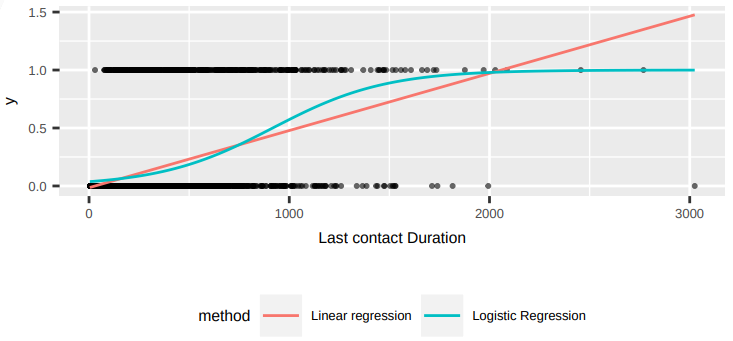

### Linear Regression vs Binary Classifier

-   We model the probability of belonging to a category
    $$P(y=1 \mid X)$$

-   We can rely on this probability to assign a class to the
    observation.

    -   For example, we can assign the class yes for all observations
        where $P(y = 1 | x) > 0.5 $

    -   But we can also select a different **threshold**.

## Simple classifier: initial example
### Load the data

In [3]:
# read some data
beer_data = pd.read_csv(data+"/beers.csv")
print(beer_data.shape)

(225, 5)


In [4]:
# show first 5 rows
beer_data.head()

,alcohol_content,bitterness,darkness,fruitiness,is_yummy
0,3.739295,0.422503,0.989463,0.215791,0
1,4.207849,0.841668,0.928626,0.380420,0
2,4.709494,0.322037,5.374682,0.145231,1
3,4.684743,0.434315,4.072805,0.191321,1
4,4.148710,0.570586,1.461568,0.260218,0


In [5]:
# show basic statistics of the data
beer_data.describe()

,alcohol_content,bitterness,darkness,fruitiness,is_yummy
count,225.000000,225.000000,225.000000,225.000000,225.000000
mean,4.711873,0.463945,2.574963,0.223111,0.528889
std,0.437040,0.227366,1.725916,0.117272,0.500278
min,3.073993,0.000000,0.000000,0.000000,0.000000
25%,4.429183,0.281291,1.197640,0.135783,0.000000
50%,4.740846,0.488249,2.026548,0.242396,1.000000
75%,5.005170,0.631056,4.043995,0.311874,1.000000
max,5.955272,1.080170,7.221285,0.535315,1.000000


### Prepare data: split features and labels

In [6]:
# all columns up to the last one:
X = beer_data.iloc[:, :-1]
# only the last column:
y = beer_data.iloc[:, -1]

### Logistic Regression


-   Like OLS, logistic “regression” computes a weighted sum of the input features to predict the output.

    -   But it transforms the sum using the **logistic function**.
        $$\hat{p}=\Pr(Y_{i}=1)=\sigma(\theta'x)$$ where
        $\sigma(\cdot)$ is the sigmoid function
        $$\sigma(a)=\frac{1}{1+\exp(-a)}$$

### Logistic Regression Prediction:
  $$\hat{y} = \{
     \begin{array}{cc}
       0 & \textrm{ if } \hat{p}<.5 \\
       1 & \textrm{ if } \hat{p}\geq.5
   \end{array}
  $$
![](https://miro.medium.com/max/1140/1*50TdLe6f_AW8wnBBkyLYgw.png)



### Using scikit-learn

In [7]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression() # set up
classifier

LogisticRegression()

###  <span style='color:green'>Your turn: `fit` & `predict` the classifier </span>

In [8]:
# Fit
classifier.fit(X, y)

# Predict
y_pred = classifier.predict(X)
y_pred[:10]

array([0, 1, 1, 1, 0, 0, 1, 1, 0, 1])

The `predict` function returns a class decision using the rule $f(x)>0.5$

In [9]:
# scores
y_scores = classifier.fit(X, y).decision_function(X)
y_scores[:3]

array([-3.12313289,  0.29298575,  1.15383398])

`decision_function` returns the linear combination of X & estimated coefficient (term inside the exponential of the Logistic regression): $d_i=\sum_{i=0}^p \beta_i x_i$

= **hyperplane** $\sum_{i=0}^p \beta_i x_i = 0$ $\rightarrow$ $d_i$negative / positive = 2 sides of the hyperplane

In [10]:
print(len(y), "examples")
print(sum(y_pred == y), "labeled correctly")

225 examples
208 labeled correctly


<div class="alert alert-block alert-info">
<i class="fa fa-info-circle"></i>
<code>y_pred == y</code> evaluates to a vector of <code>True</code> or <code>False</code> Boolean values. When used as numbers, Python handles <code>True</code> as <code>1</code> and <code>False</code> as <code>0</code>. So, <code>sum(...)</code> simply counts the correctly predicted labels.
</div>


## Metrics for evaluating the performance of a classifier

`sklearn.metrics` contains many metrics like `precision_score` etc., `confusion_matrix` prints what it means.

In [11]:
from sklearn.metrics import (precision_score, recall_score, f1_score, 
                             confusion_matrix, accuracy_score, roc_curve, auc, roc_auc_score)

After applying a classifier to a data set with known labels `0` and `1`:

<div class="alert alert-block alert-warning">

<div style="font-size: 150%;"><i class="fa fa-info-circle"></i>&nbsp;Definition</div>
<ul>

<li><strong>TP (true positives)</strong>: labels which were predicted as <code>1</code> and actually are <code>1</code>. <br/><br/>


<li><strong>TN (true negatives)</strong>: labels which were predicted as <code>0</code> and actually are <code>0</code>.<br/><br/>


<li><strong>FP (false positives)</strong>: labels which were predicted as <code>1</code> and actually are <code>0</code>.<br/><br/>


<li><strong>FN (false negatives)</strong>: labels which were predicted as <code>0</code> and actually are <code>1</code>.<br/><br/>

</ul>

To memorize this: 

<ul>

<li>The second word "positives"/"negatives" refers to the prediction computed by the classifier.
<li>The first word "true"/"false" expresses if the classification was correct or not.

</ul>

This is the so called <strong>Confusion Matrix</strong>:

<table style="border: 1px; font-family: 'Source Code Pro', monocco, Consolas, monocco, monospace;
              font-size:110%;">
    <tbody >
        <tr>
            <td style="padding: 10px; background:#f8f8f8;"> </td>
            <td style="padding: 10px; background:#f8f8f8;">Predicted N</td>
            <td style="padding: 10px; background:#f8f8f8;">Predicted P</td>
        </tr>
        <tr>
            <td style="padding: 10px; background:#f8f8f8;">Actual N</td>
            <td style="padding: 10px; background:#fcfcfc; text-align:center; font-weight: bold">TN         </td>
            <td style="padding: 10px; background:#fcfcfc; text-align:center; font-weight: bold">FP         </td>
        </tr>
        <tr>
            <td style="padding: 10px; background:#f8f8f8;">Actual P</td>
            <td style="padding: 10px; background:#fcfcfc; text-align:center; font-weight: bold">FN         </td>
            <td style="padding: 10px; background:#fcfcfc; text-align:center; font-weight: bold">TP         </td>
        </tr>
    </tbody>
</table>

</div>



- So the total number of predictions can be expressed as `TP` + `FP` + `FN` + `TN`.


- The number of correct predictions is `TP` + `TN`.


- `TP` + `FN` is the number of positive examples in our data set, 


- `FP` + `TN` is the number of negative examples.

- **precision** is computed as <code>TP / (TP + FP)</code>.


- **recall** is computed as <code>TP / (TP + FN)</code>.

- The **F1 score** is computed as <code>F1 = 2 * (precision * recall) / (precision + recall)</code>.


<div class="alert alert-block alert-warning">
<div style="font-size: 150%;"><i class="fa fa-info-circle"></i>&nbsp;Definition</div>

This allows us to define <strong>accuracy</strong> as (<code>TP</code> + <code>TN</code>) / (<code>TP</code> + <code>FP</code> + <code>FN</code> + <code>TN</code>).

</div>



### Confusion matrix

In [12]:
# using the results of the simple classifier of part 1
print(confusion_matrix(y, y_pred))

[[ 94  12]
 [  5 114]]


### Other metrics

In [13]:
# The first argument of the metrics functions is the exact labels, 
# the second argument is the predictions:

print("{:20s} {:.3f}".format("precision", precision_score(y, y_pred)))
print("{:20s} {:.3f}".format("recall", recall_score(y, y_pred)))
print("{:20s} {:.3f}".format("f1", f1_score(y, y_pred)))
print("{:20s} {:.3f}".format("accuracy", accuracy_score(y, y_pred)))
print("{:20s} {:.3f}".format("auc", roc_auc_score(y, y_scores)))

precision            0.905
recall               0.958
f1                   0.931
accuracy             0.924
auc                  0.970


 ### Two helper functions

In [14]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

def samples_color(ilabels, colors=["steelblue", "chocolate"]):
    '''Return colors list from labels list given as indices.'''
    return [colors[int(i)] for i in ilabels]

def plot_decision_surface(
    features_2d, labels, classifier, preprocessing=None,
    plt=plt, marker='.', N=100, alpha=0.2, colors=["steelblue", "chocolate"], title=None,
    test_features_2d=None, test_labels=None, test_s=60,
):
    '''Plot a 2D decision surface for a already trained classifier.'''

    # sanity check
    assert len(features_2d.columns) == 2

    # pandas to numpy array; get min/max values
    xy = np.array(features_2d)
    min_x, min_y = xy.min(axis=0)
    max_x, max_y = xy.max(axis=0)

    # create mesh of NxN points; tech: `N*1j` is spec for including max value
    XX, YY = np.mgrid[min_x:max_x:N*1j, min_y:max_y:N*1j]
    points = np.c_[XX.ravel(), YY.ravel()] # shape: (N*N)x2

    # apply scikit-learn API preprocessing
    if preprocessing is not None:
        points = preprocessing.transform(points)
    
    # classify grid points
    classes = classifier.predict(points)

    # plot classes color mesh
    ZZ = classes.reshape(XX.shape) # shape: NxN
    plt.pcolormesh(
        XX, YY, ZZ,
        alpha=alpha, cmap=matplotlib.colors.ListedColormap(colors),
    )
    # plot points
    plt.scatter(
        xy[:,0], xy[:,1],
        marker=marker, color=samples_color(labels, colors=colors),
    );
    # set title
    if title:
        if hasattr(plt, 'set_title'):
            plt.set_title(title)
        else:
            plt.title(title)
    # plot test points
    if test_features_2d is not None:
        assert test_labels is not None
        assert len(test_features_2d.columns) == 2
        test_xy = np.array(test_features_2d)
        plt.scatter(
            test_xy[:,0], test_xy[:,1],
            s=test_s, facecolors='none', color=samples_color(test_labels),
        );


## An overview of classifiers
1. Nearest Neighbors
2. Logistic regression
3. Support verctor models

## Nearest Neighbors
The idea is very simple: to classify a sample $x$ look for **$N$ closests samples in the training data** (by default, using the Euclidean distance) and take **majority of their labels** as a result.


### K-Nearest Neighbors

For $K$ and a test observation $x_0$
1. KNN classifier first identifies the $K$ points in the training data that are closest to $x_0$ (i.e $N_0$)
2. estimates the conditional probability for class $j$ as the fraction of points in $N_0$ whose response values equal $j$:

$$ P(Y=j|X=x_O) = \frac{1}{K}\sum_{i \in N_O} I (y_i=j)$$

3. applies Bayes rule and classifies the test observationx to the class with the largest probability


### KNN: illustration 1

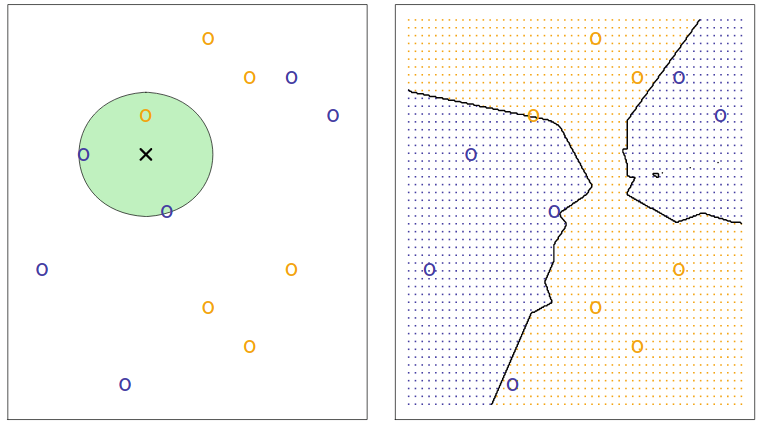

- Assume $K=3$
- Left: small training data set consisting of 6 blue and 6 orange observations
- Right: KNN approach at of the possible values for $X_1$ and $X_2$, and  corresponding KNN decision boundary

- goal is to make a prediction for the point labeled by the black cross
1. KNN finds the 3 observations that are closest to the cross
2. neighborhood is 1/3 orange & 2/3 blue $\rightarrow$ the cross belongs to the blue class

### KNN: illustration 2

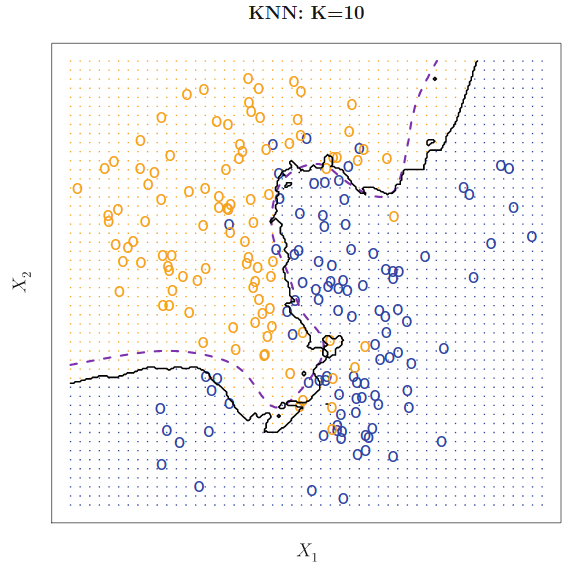
- black curve: KNN decision boundary
- dashed line: Bayes decision boundary

## KNN: choice of $K$

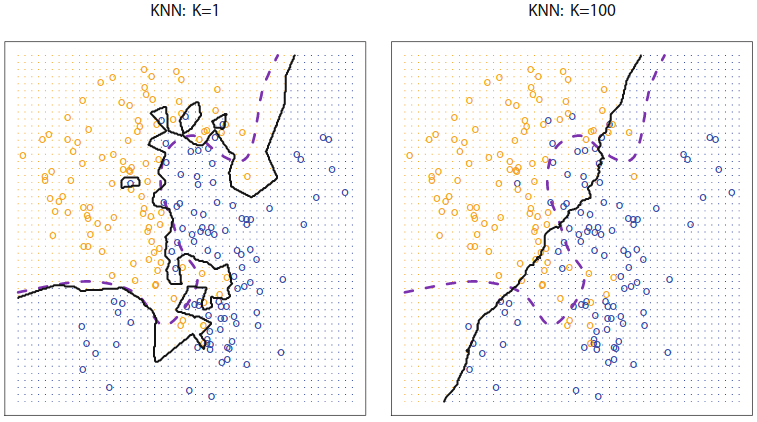
- $K=1$,the KNN training error rate is $0$, but the test error rate may be quite high

Notes:
- with more flexible classification methods, the training error rate will decline but the test error rate may not

#### Demonstration using a **toy data**

In [15]:
import pandas as pd

df = pd.read_csv(data+"/xor.csv")
df.head(2)

,x,y,label
0,-1.539782,0.950822,True
1,0.436266,-1.768324,True


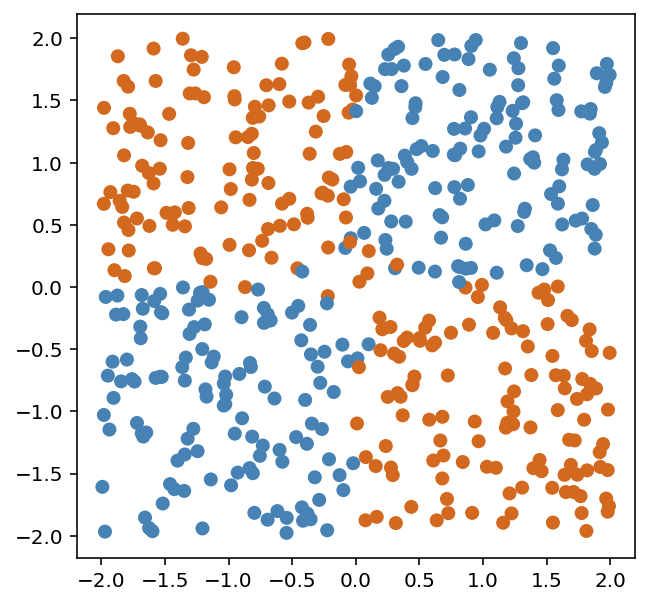

In [16]:
features_2d = df.loc[:, ("x", "y")]
labelv = df["label"]

plt.figure(figsize=(5, 5))
plt.scatter(features_2d.iloc[:,0], features_2d.iloc[:,1], color=samples_color(labelv));

### Split train & test sets

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_2d, labelv, random_state=10)

### Fit `KNeighborsClassifier`

In [18]:
from sklearn.neighbors import KNeighborsClassifier

# Let's use 5 neighbors to learn
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

###  <span style='color:green'>Your turn: compute the train & test accuracy (you can use the `score` method) </span>

In [19]:
print('train score: {:.2f}%'.format(100*classifier.score(X_train, y_train)))
print('test score: {:.2f}%'.format(100*classifier.score(X_test, y_test)))

train score: 97.33%
test score: 93.60%


### Plotting the decision surfaces

/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


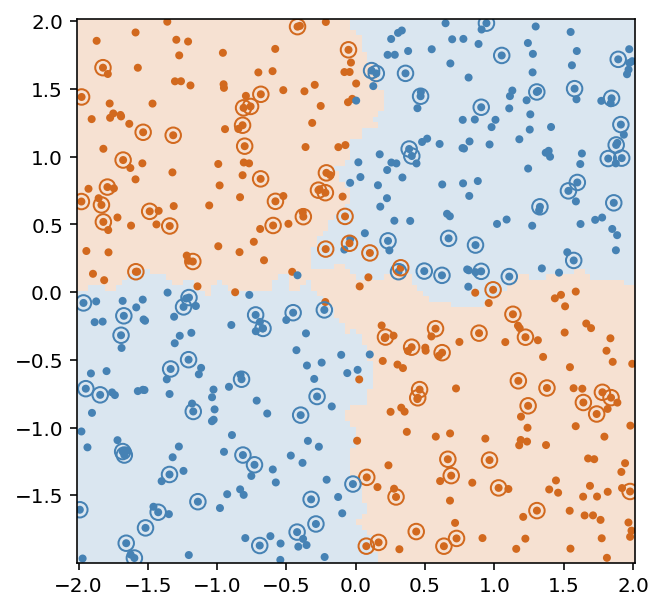

In [20]:
plt.figure(figsize=(5, 5))
plot_decision_surface(
    features_2d, labelv, classifier,
    test_features_2d=X_test, test_labels=y_test,
)

About the plot: **the points surrounded by a circle are from the test data set** (not used for learning), all other points belong to the training data.

### Changing the parameters:


# Distance  1

## Nb neighbors:  1
test score: 95.20%


/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


## Nb neighbors:  10
test score: 92.80%


/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


## Nb neighbors:  100
test score: 93.60%


/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(



# Distance  2

## Nb neighbors:  1
test score: 96.00%


/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


## Nb neighbors:  10
test score: 92.80%
## Nb neighbors:  100
test score: 91.20%


/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


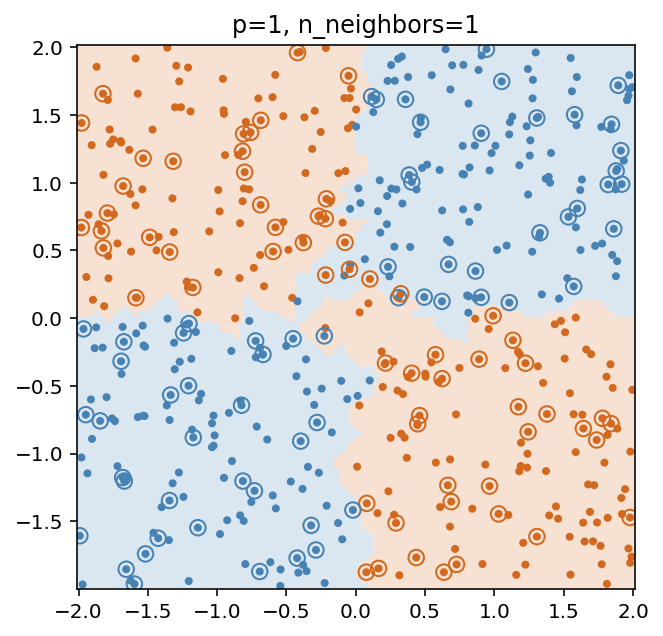

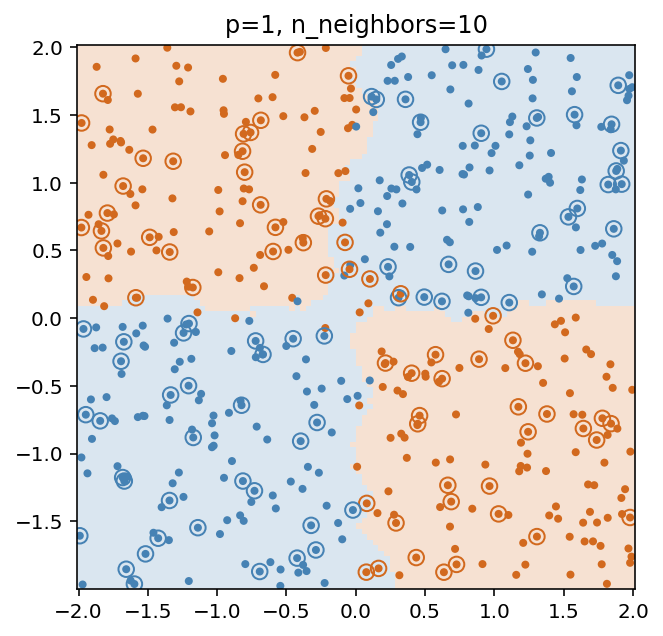

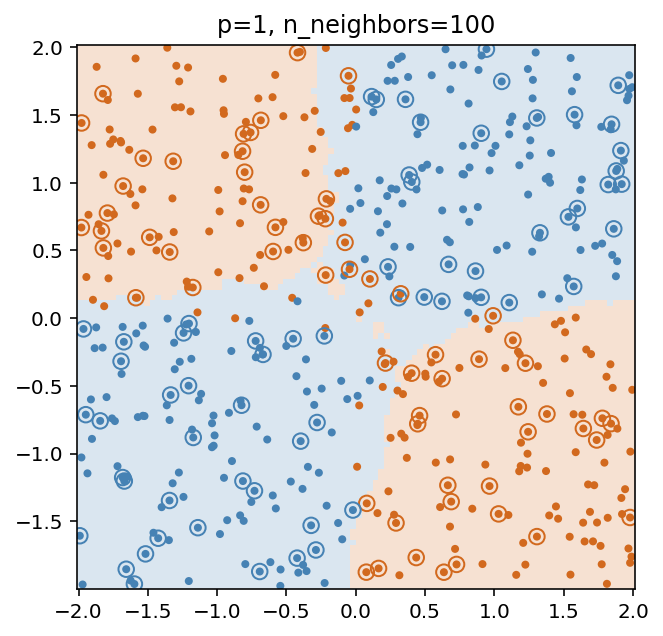

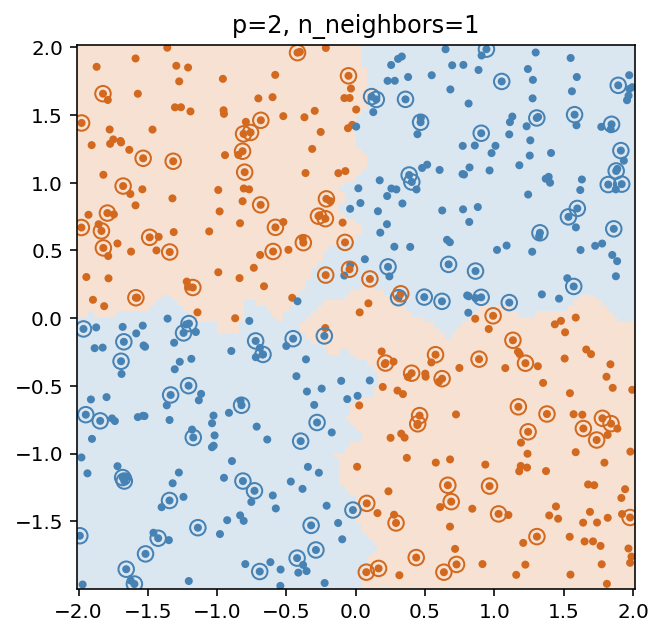

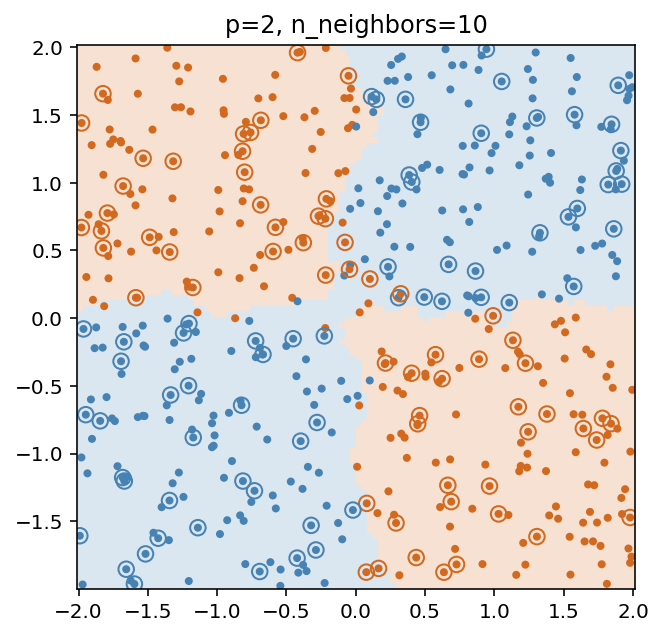

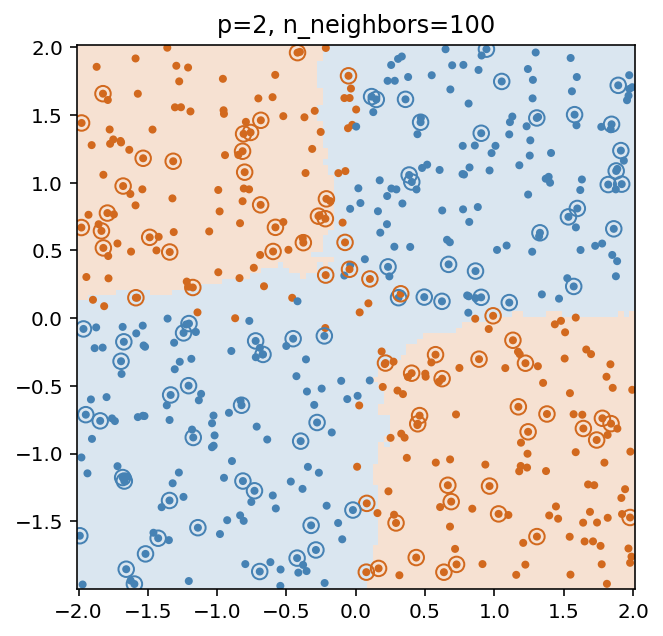

In [21]:
n_neighbors_list = [1, 10, 100]
p_list = [1, 2] #1=Manhatan distance norm ; 2=Euclidian distance

print()
for p in p_list:
    print('# Distance ', p)
    print()
    for n_neighbors in n_neighbors_list:
        print('## Nb neighbors: ', n_neighbors)
        # Note: increase max iterations 10x for solver's convergence
        classifier = KNeighborsClassifier(n_neighbors=n_neighbors, p=p)
        classifier.fit(X_train, y_train)
        print('test score: {:.2f}%'.format(100*classifier.score(X_test, y_test)))
        # print('weights: ', classifier.coef_[0])

        plt.figure(figsize=(5, 5))
        plt.title("p={}, n_neighbors={}".format(p, n_neighbors))
        plot_decision_surface(
            features_2d, labelv, classifier,
            test_features_2d=X_test, test_labels=y_test,
        )        
    print()

## Logistic Regression

In scikit-learn `LogisticRegression` the regularization weight is passed here in "inverse", as a classification weight parameter `C` (default `1`), meaning that it multiplies the classification loss, not the regularization penalty:

$$\text{cost} =  \text{C}\cdot\text{classification_loss} + \text{regularization_penalty}$$

#### Demonstration using a simple example

In [22]:
df = pd.read_csv(data+"/line_separable_2d.csv")
df.head(2)

,x,y,label
0,-3.252709,-0.821378,0
1,-3.816946,-0.906188,0


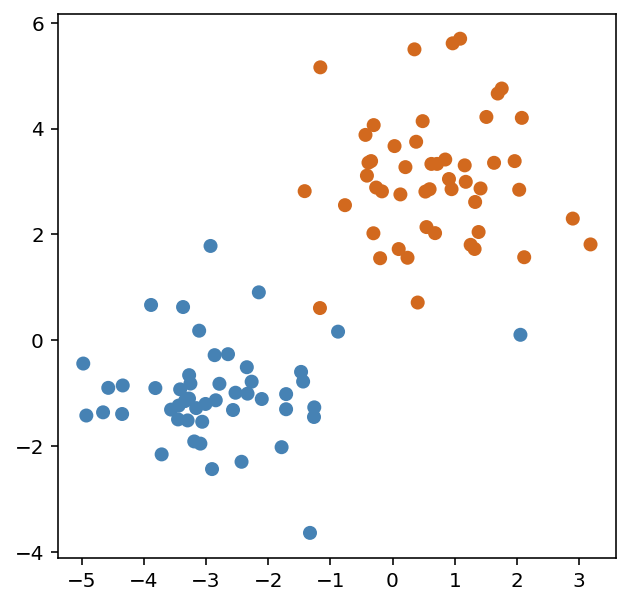

In [23]:
features_2d = df.loc[:, ("x", "y")]
labelv = df["label"]

plt.figure(figsize=(5, 5))
plt.scatter(features_2d.iloc[:,0], features_2d.iloc[:,1], color=samples_color(labelv));

In [24]:
X_train, X_test, y_train, y_test = train_test_split(features_2d, labelv, random_state=0)

classifier = LogisticRegression(C=1, random_state=0)
y_score=classifier.fit(X_train, y_train)
print('train score: {:.2f}%'.format(100*classifier.score(X_train, y_train)))
print('test score: {:.2f}%'.format(100*classifier.score(X_test, y_test)))

train score: 97.33%
test score: 96.00%


<div class="alert alert-block alert-info">

<p><i class="fa fa-info-circle"></i>&nbsp;
The <strong>classification loss</strong> in logistic regression is a so called <em>negative-log likelihood</em>, i.e. a negative logarithm of the logistic probability above:
<p/>
    
<p>
$$ \text{classification_loss} = -\log(p(x^k; p^k)) = \log{\left(1+\exp{\left(y^k\left(b - \sum_{i=1}^{n} w_i x_i^k\right)\right)}\right)}$$
<p/>

<p>
where $y^k$ is -1 or 1, representing class of $k$-th sample from the training data, corresponding, respectively, to class below and above the threshold (the separation line).

The $+/-$ sign for the class penalizes missclassifications. If sample is below the threshold $\sum_{i=1}^{n} w_i x_i^k < b$ and have the correct class $y^k = -1$, then we have $\exp{\left(\text{negative value}\right)}$ giving small loss. In case of misclassification $\exp{\left(\text{positive value}\right)}$ gives a much bigger loss.
</p>
</div>

<div class="alert alert-block alert-info">
<p><i class="fa fa-info-circle"></i>&nbsp;
The <strong>reqularization penalty</strong> in logistic regression is a <em>norm of the learnt weights</em>, denoted as:

<p>
$$\text{regularization_penalty} = \left\lVert w \right\rVert_p$$
</p>

<p>
Using <em>L1 norm</em> ($p=1$, Manhatan distance from origin, which is sum of absolute weight values) is know for finding sparse solutions, i.e. eliminating features (weight equal to 0) when they are have low significance. With the default <em>L2 norm</em> ($p=2$, Euclidian distance from origin, which is square root of sum of squared weight values), weights of insignificant features would have small non-zero values instead.
</p>

<p>
In <code>LogisticRegression</code> class, <code>penalty</code> parameter allows to specify type of norm to use.
</p>

<p>
Note that any solution weights and its threshold can be scaled to give the same result. Thus the regularization penalty not only prevents overfitting but also ensures a unique solution.
</p>

</div>

### Looking at the role of the classification weight parameter:

feature weights: [[0.55729655 1.9409654 ]]


With C=100

train score: 100.00%
test score: 92.00%
feature weights: [[1.00188452 9.59491678]]


/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


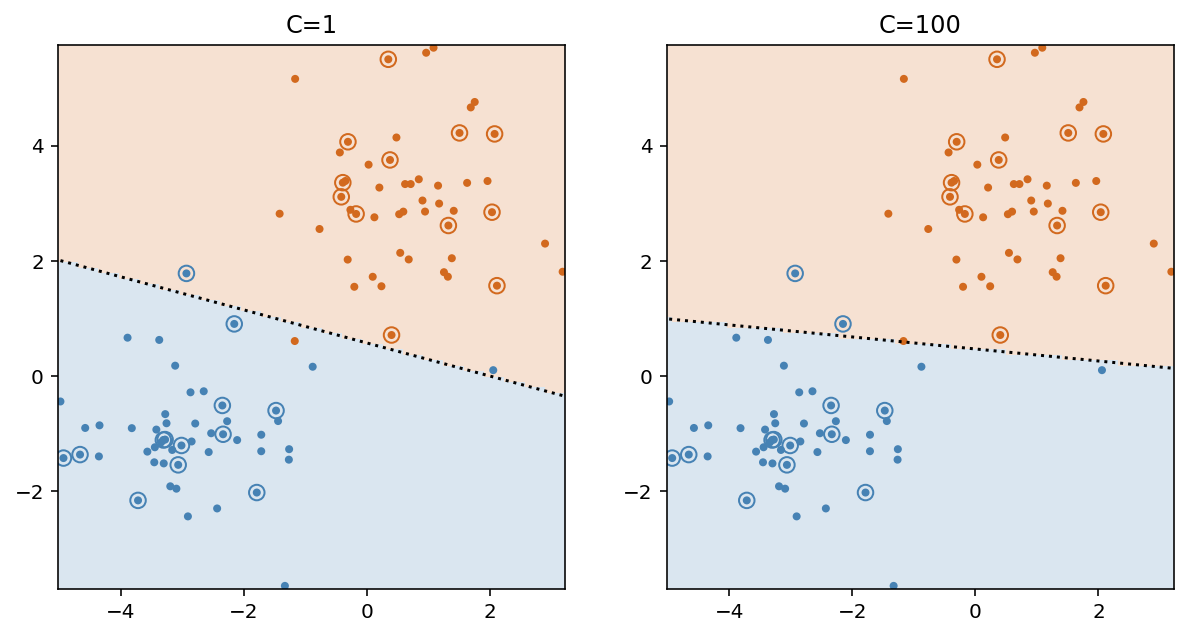

In [25]:
fig, ax_arr = plt.subplots(ncols=2, nrows=1, figsize=(2*5, 5))

plot_decision_surface(
    features_2d, labelv, classifier,
    test_features_2d=X_test, test_labels=y_test,
    plt=ax_arr[0],
    title='C=1',
)

print('feature weights:', classifier.coef_)

def plot_separation_line(features_2d, linear_classifier, plt=plt):
    '''Plot a separation line for 2D dataset'''
    
    assert hasattr(linear_classifier, 'coef_') 
    
    w = linear_classifier.coef_[0]
    b = -linear_classifier.intercept_ # NOTE: intercept = negative threshold

    # separation line: w[0] * x + w[1] * y - b == 0
    feat_x = features_2d.iloc[:, 0]
    x = np.linspace(np.min(feat_x), np.max(feat_x), 2)
    y =  (b - w[0] * x) / w[1]
    plt.plot(x, y, color='k', linestyle=':');

plot_separation_line(features_2d, classifier, plt=ax_arr[0])


print()
print()
print('With C=100')
print()

classifier = LogisticRegression(C=100, random_state=0)
classifier.fit(X_train, y_train)
print('train score: {:.2f}%'.format(100*classifier.score(X_train, y_train)))
print('test score: {:.2f}%'.format(100*classifier.score(X_test, y_test)))
print('feature weights:', classifier.coef_)

plot_decision_surface(
    features_2d, labelv, classifier,
    test_features_2d=X_test, test_labels=y_test,
    plt=ax_arr[1],
    title='C=100',
)
plot_separation_line(features_2d, classifier, plt=ax_arr[1])

* `C=100` => the model tries hard to get all training points correctly classified, whereas with 
* `C=1` => we allow misclassification in training, in order to possibly get more general model and avoid overfitting.

## Support Vector Machine

**See slides**

### Linear SVM

Support-Vector Machine (SVM) classifier tries to separate two classes with a line by **finding data points (support vectors) lying closest to the separation plane**. These points determine separation plane (weights and threshold/intercept).

The weights are learned such that the **margin between support vectors of different classes is maximized**.

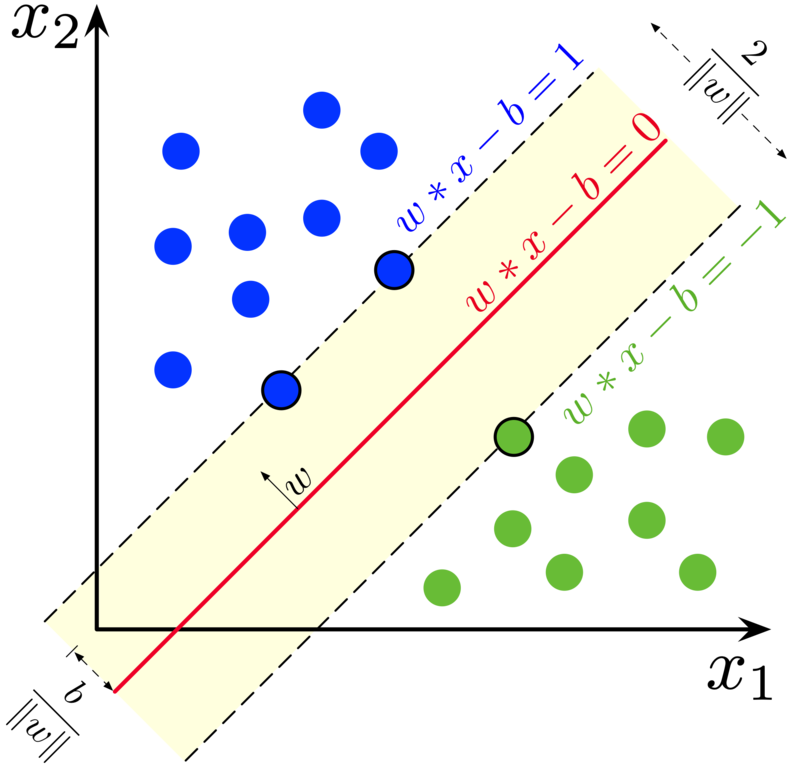

Like in linear regression the classification is based on a weighted sum of the features (and margin maximization corresponds to minimization of the regularization penalty). 

Analogously to the Nearest Neighbors method the data points (support vectors) decide the class of a new data sample.

### Demonstration: linear separable data

In [26]:
df = pd.read_csv(data+"/line_separable_2d.csv")
features_2d = df.loc[:, ("x", "y")]
labelv = df["label"]

### Train SVC

In [27]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_2d, labelv, random_state=0)

classifier = LinearSVC(C=1)
classifier.fit(X_train, y_train)
print('train score: {:.2f}%'.format(100*classifier.score(X_train, y_train)))
print('test score: {:.2f}%'.format(100*classifier.score(X_test, y_test)))

train score: 98.67%
test score: 96.00%


feature weights: [[0.15854705 1.01077749]]


With C=100

train score: 100.00%
test score: 92.00%
feature weights: [[0.81574403 8.45144543]]


/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


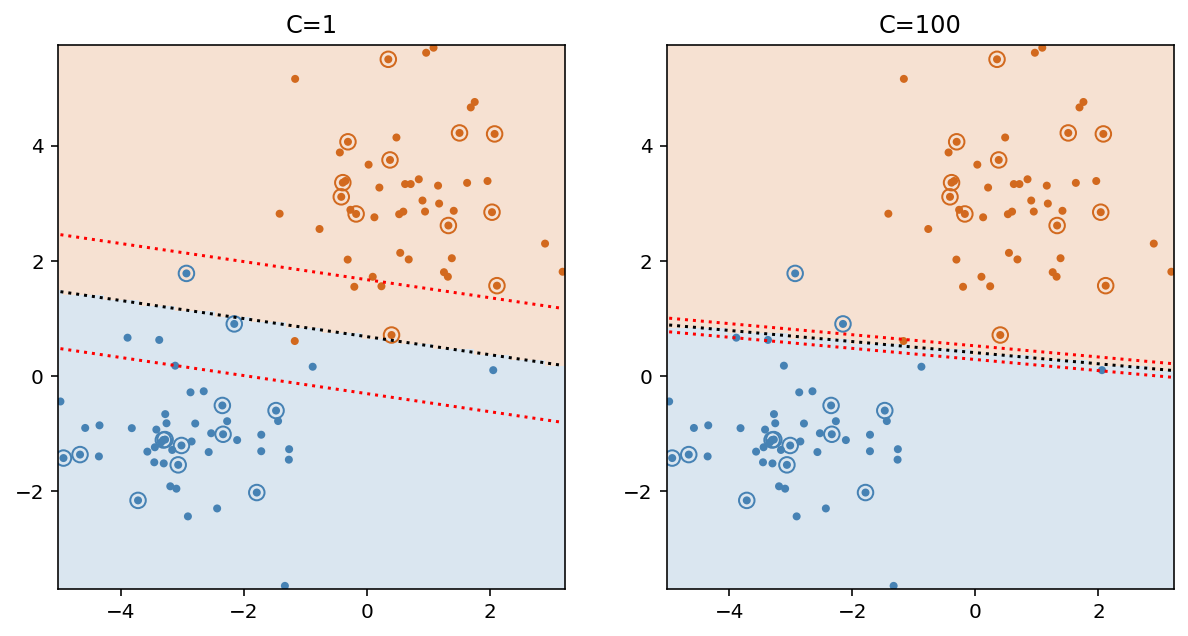

In [28]:
fig, ax_arr = plt.subplots(ncols=2, nrows=1, figsize=(2*5, 5))
                                                      
plot_decision_surface(
    features_2d, labelv, classifier,
    test_features_2d=X_test, test_labels=y_test,
    plt=ax_arr[0],
    title='C=1', 
)

print("feature weights:", classifier.coef_)

def plot_margins(features_2d, linear_classifier, plt=plt):
    '''Plot a separation line and margin lines for 2D dataset'''
    
    assert hasattr(linear_classifier, 'coef_') 
    
    w = linear_classifier.coef_[0]
    b = -linear_classifier.intercept_ # NOTE: intercept = negative threshold

    # separation line: w[0] * x + w[1] * y - b == 0
    feat_x = features_2d.iloc[:, 0]
    x = np.linspace(np.min(feat_x), np.max(feat_x), 2)
    y =  (b - w[0] * x) / w[1]
    plt.plot(x, y, color='k', linestyle=':');

    # margin lines: w[0] * x + w[1] * y - b == +/-1
    y =  ((b - 1) - w[0] * x) / w[1]
    plt.plot(x, y, color='r', linestyle=':');
    y =  ((b + 1) - w[0] * x) / w[1]
    plt.plot(x, y, color='r', linestyle=':');

plot_margins(features_2d, classifier, plt=ax_arr[0])


print()
print()
print('With C=100')
print()
                                                      
# higher C = more narrow ("harder") margin
# Note: increase max iterations 50x for solver's convergence
classifier = LinearSVC(C=100, max_iter=50000)
classifier.fit(X_train, y_train)
print('train score: {:.2f}%'.format(100*classifier.score(X_train, y_train)))
print('test score: {:.2f}%'.format(100*classifier.score(X_test, y_test)))
print("feature weights:", classifier.coef_)

plot_decision_surface(
    features_2d, labelv, classifier,
    test_features_2d=X_test, test_labels=y_test,
    plt=ax_arr[1],
    title='C=100', 
)
plot_margins(features_2d, classifier, plt=ax_arr[1]);

### Demonstration: circle data

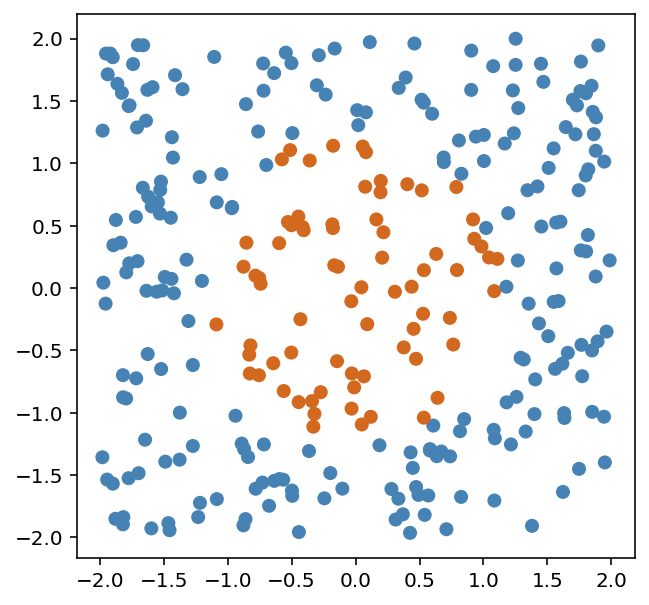

In [29]:
import pandas as pd

df = pd.read_csv(data+"/circle.csv")
features_2d = df.loc[:, ("x", "y")]
labelv = df["label"]

plt.figure(figsize=(5, 5))
plt.scatter(features_2d.iloc[:,0], features_2d.iloc[:,1], color=samples_color(labelv));

### Fit a linear SVC

score: 81.33%
feature weights: [[-0.00750497 -0.0153597 ]]


/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


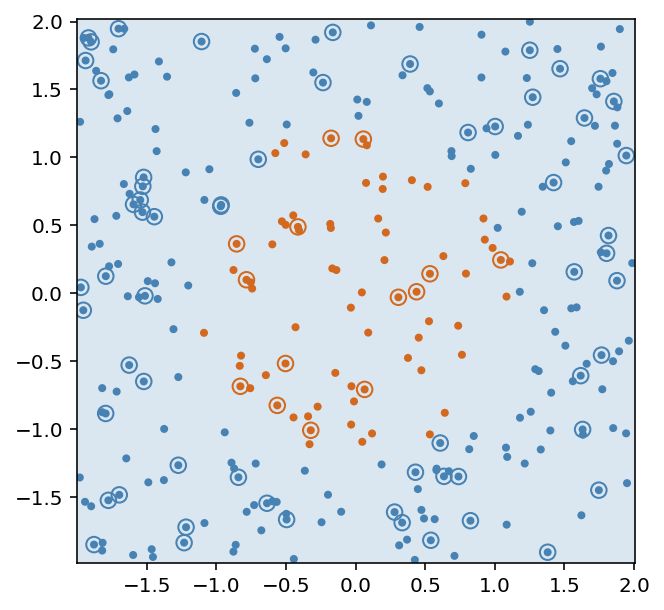

In [30]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_2d, labelv, random_state=0)

classifier = LinearSVC()
classifier.fit(X_train, y_train)
print('score: {:.2f}%'.format(100*classifier.score(X_test, y_test)))

plt.figure(figsize=(5, 5))
plot_decision_surface(
    features_2d, labelv, classifier,
    test_features_2d=X_test.iloc[:,:2], test_labels=y_test,
)

print("feature weights:", classifier.coef_)

### Kernel based SVM
Data is usually not at all linearily separable.

In [31]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_2d, labelv, random_state=0)

##  <span style='color:green'>Your turn: kernel classifier</span>

<span style='color:green'>Specify a radial kernel based SVM (ie 'rbf') & a gamma of your choice</span>

<span style='color:green'>Compute accuracy </span>

The `gamma` parameter controls both size and *smoothness* of the decision surface.

**`gamma` parameter is crucial for a good performance!**

<div class="alert alert-block alert-warning">

<p><i class="fa fa-warning"></i>&nbsp;
Before using <strong>kernel SVM</strong> you need to <strong>scale (normalize) your features first</strong>. This is because it relies on the "similarity"/"distance" function. Otherwise, kernel SVM might not work well.</p>
    
</div>

In [32]:
classifier = SVC(kernel='rbf', gamma=20)
classifier.fit(X_train, y_train)

print('train score: {:.2f}%'.format(100*classifier.score(X_train, y_train)))
print('test score: {:.2f}%'.format(100*classifier.score(X_test, y_test)))

train score: 98.67%
test score: 96.00%


#support vectors: [130  51]


/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


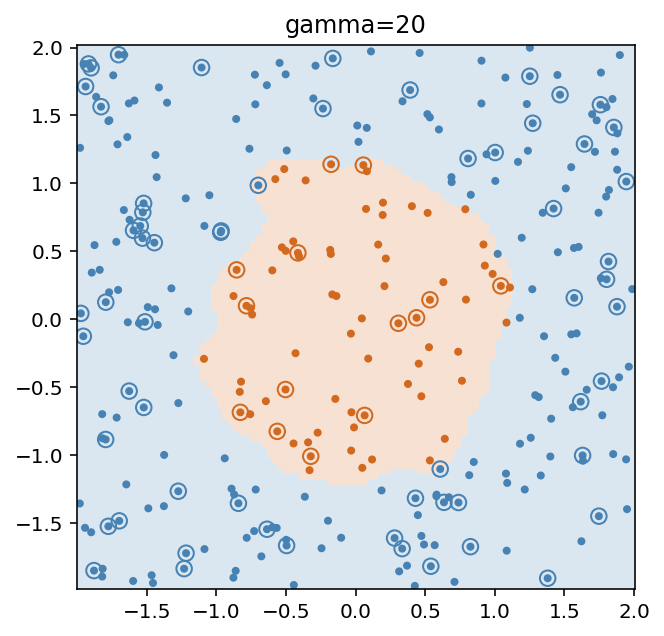

In [33]:
# NOTE: mapping is implicit - feature weights are not there anymore (coef_);
#       instead we have only support vectors (and their weights; dual_coef_).
#
# Let's just see how many of samples are used as support vectors for each class.
print('#support vectors:', classifier.n_support_)

plt.figure(figsize=(5, 5))
plot_decision_surface(
    features_2d, labelv, classifier,
    test_features_2d=X_test, test_labels=y_test,
    title='gamma=20',
)

### How to choose `gamma`?

/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


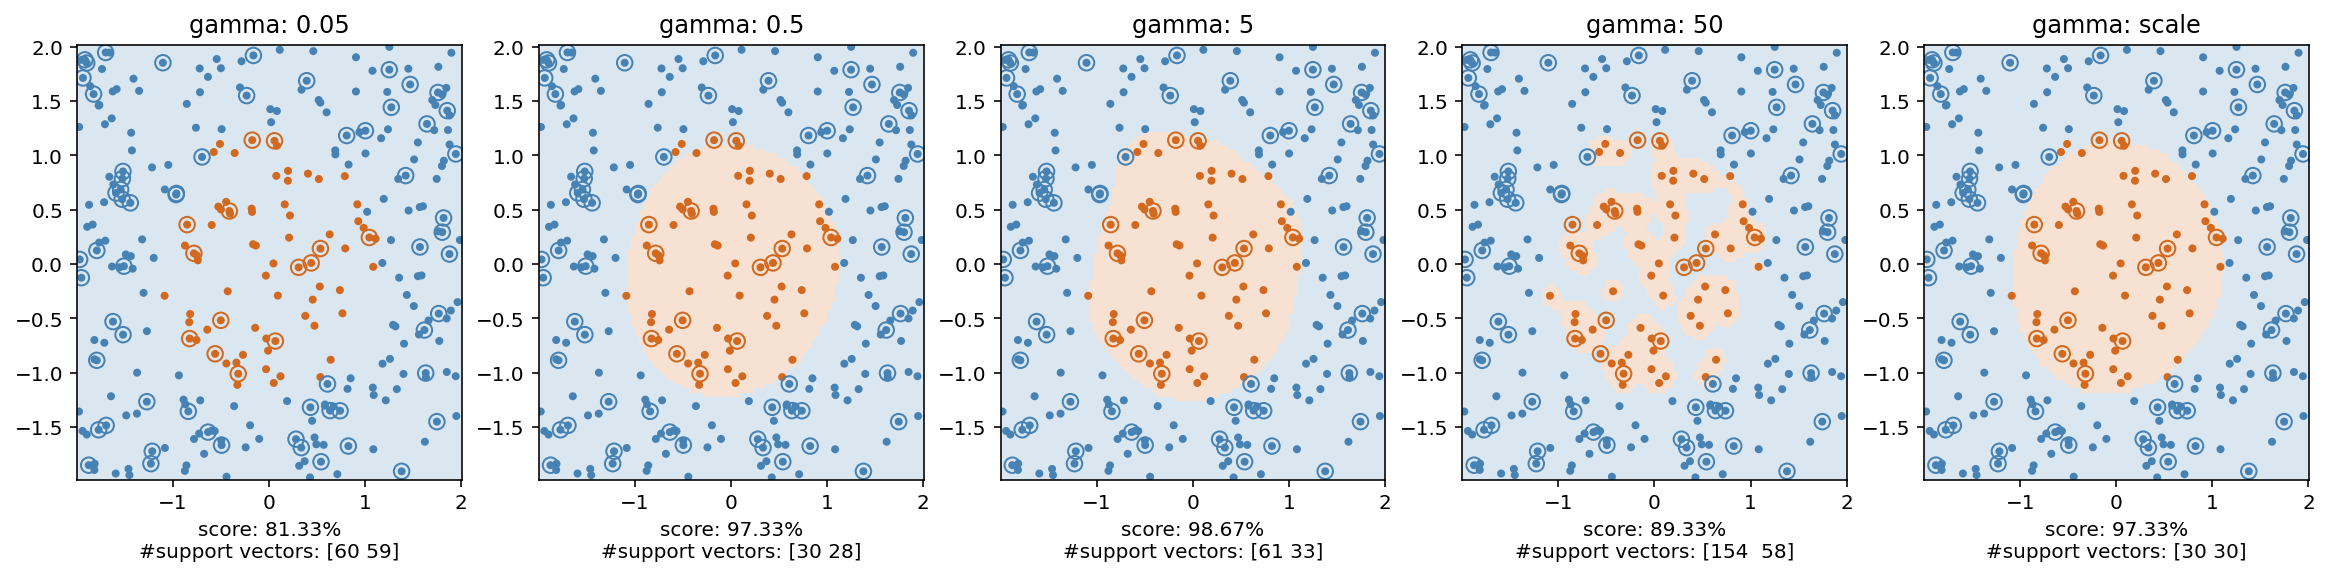

In [34]:
kernel = 'rbf'
gammas = [0.05, 0.5, 5, 50, 'scale',]

n = len(gammas)
m = 1
fig, ax_arr = plt.subplots(ncols=n, nrows=m, figsize=(4*n, 4*m))

for i, gamma in enumerate(gammas):
    classifier = SVC(kernel=kernel, gamma=gamma)
    classifier.fit(X_train, y_train)

    iax = ax_arr[i]
    iax.set_title("gamma: " + str(gamma))
    iax.set_xlabel(
        'score: {:.2f}%\n#support vectors: {}'.format(
            100*classifier.score(X_test, y_test),
            classifier.n_support_,
        )
    )

    plot_decision_surface(
        features_2d, labelv, classifier,
        test_features_2d=X_test, test_labels=y_test,
        plt=iax,
    )
 

### Which kernels do work?

/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


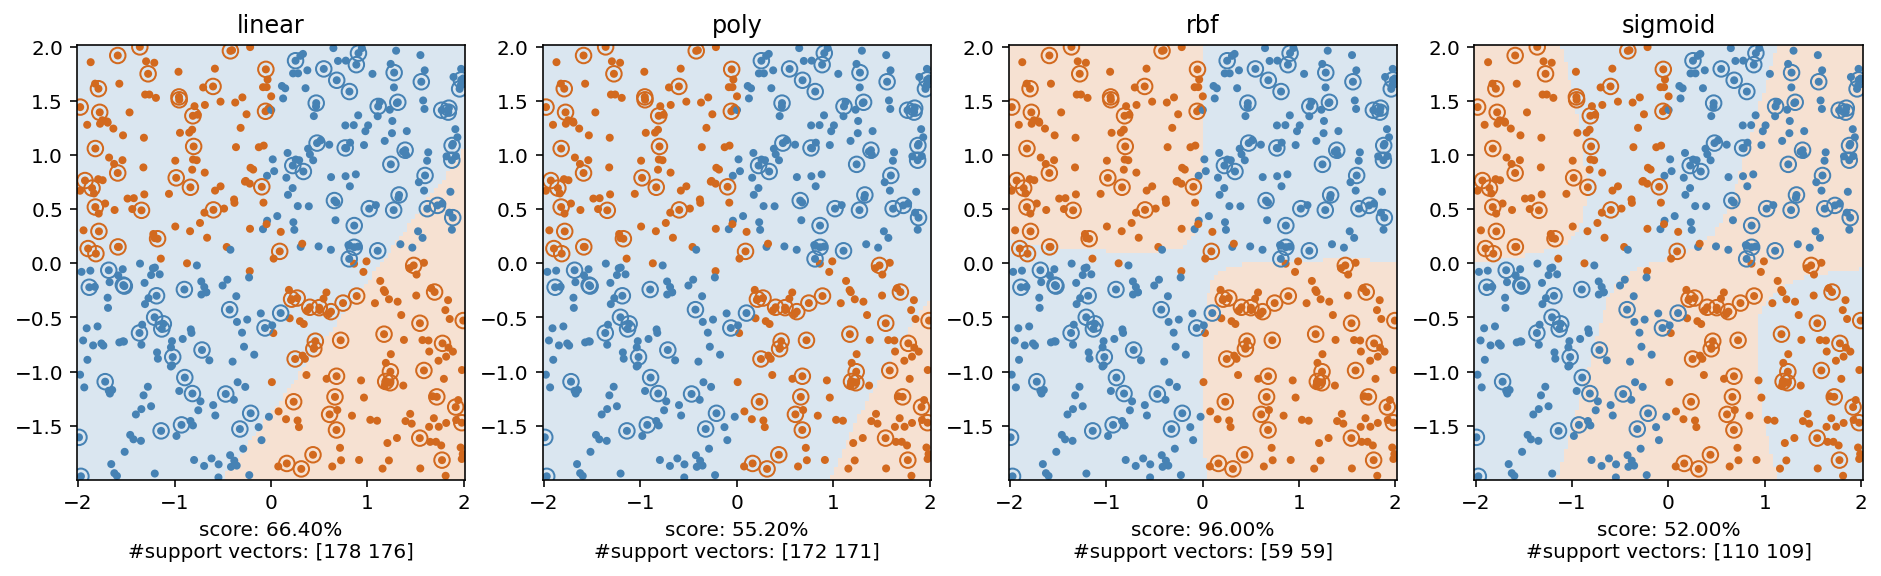

In [35]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid',]

df = pd.read_csv(data+"/xor.csv")
features_2d = df.loc[:, ("x", "y")]
labelv = df["label"]

X_train, X_test, y_train, y_test = train_test_split(features_2d, labelv, random_state=0)

kernels = ['linear', 'poly', 'rbf', 'sigmoid',]
gamma = 'scale'

n = len(kernels)
m = 1
fig, ax_arr = plt.subplots(ncols=n, nrows=m, figsize=(4*n, 4*m))

for j, kernel in enumerate(kernels):
    classifier = SVC(kernel=kernel, gamma='scale')
    classifier.fit(X_train, y_train)
    
    iax = ax_arr[j]
    iax.set_title(kernel)
    iax.set_xlabel(
        'score: {:.2f}%\n#support vectors: {}'.format(
            100*classifier.score(X_test, y_test),
            classifier.n_support_,
        )
    )

    plot_decision_surface(
        features_2d, labelv, classifier,
        test_features_2d=X_test, test_labels=y_test,
        plt=iax,
    )
